In [1]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Create and move into a specific project folder
import os
project_folder = '/content/drive/MyDrive/Colab_Projects/RunningLMM'

if not os.path.exists(project_folder):
    os.makedirs(project_folder)
    print(f"Created folder: {project_folder}")

# 3. Change the working directory to this folder
os.chdir(project_folder)
print(f"Current Directory: {os.getcwd()}")

Mounted at /content/drive
Current Directory: /content/drive/MyDrive/Colab_Projects/RunningLMM


In [2]:
# Run this in a cell
!nvidia-smi

Wed Jan 14 19:37:17 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
!curl -fsSL https://deb.nodesource.com/setup_20.x | sudo -E bash - && \
sudo apt-get install -y nodejs && \
sudo npm install -g @anthropic-ai/claude-code && \
export PATH=/usr/bin:$PATH

2026-01-14 19:37:42 - Installing pre-requisites
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://cli.github.com/packages stable InRelease [3,917 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,297 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 https://cli.github.com/packages stable/main amd64 Packages [354 B]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,606 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [6,205 kB]
Hit:12 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:1

In [4]:
!claude


Welcome to Claude Code v2.1.7 
…………………………………………………………………………………………………………………………………………………………

     *                                       █████▓▓░
                                 *         ███▓░     ░░
            ░░░░░░                        ███▓░
    ░░░   ░░░░░░░░░░                      ███▓░
   ░░░░░░░░░░░░░░░░░░░    *                ██▓░░      ▓
                                             ░▓▓███▓▓░
 *                                 ░░░░                   
                                 ░░░░░░░░                 
                               ░░░░░░░░░░░░░░░░           
       █████████                                        *
      ██▄█████▄██                        *
       █████████      *
…………………█ █   █ █………………………………………………………………………………………………………………


 Let's get started.

 Choose the text style that looks best with your terminal
 To change this later, run /theme

 ❯ 1. Dark mode ✔
   2. Light mode
   3. Dark mode (colorblind-friendly)
   4. Light mode (colorblind-friendly)
   

In [5]:
!pip install -q transformers torch datasets accelerate tqdm huggingface_hub bitsandbytes


In [6]:
!hf auth login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) y
Token is valid (permission: fineGrained).
The token `agentic_token` has been saved to /root/.cache/huggingface/stored_tokens
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authent

# Various Quantized Models

### GPU & No Quantization

Real Time: 0.4 minutes

CPU Time (process): 0.2 minutes

GPU Time (CUDA kernels): 0.3 minutes

Inferences timed: 252

In [20]:
!python llama_mmlu_eval_quantized.py


Llama 3.2-1B MMLU Evaluation (Quantized)

Environment Check
 Running in Google Colab
 Platform: Linux (x86_64)
 GPU Available: Tesla T4
 GPU Memory: 15.83 GB
 Quantization disabled - loading full precision model
 Hugging Face authenticated

Configuration
Model: meta-llama/Llama-3.2-1B-Instruct
Device: cuda
Quantization: None (full precision)
Expected memory: ~2.5 GB (FP16)
Number of subjects: 2


Loading model meta-llama/Llama-3.2-1B-Instruct...
Device: cuda
 Tokenizer loaded
Loading model (this may take 2-3 minutes)...
2026-01-14 20:08:25.901823: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768421305.978845   11502 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768421305.996178   11502 cuda_blas.cc:1407] Unable to register cuBLAS facto

### GPU & 4 Bit

Real Time: 0.3 minutes

CPU Time (process): 0.3 minutes

GPU Time (CUDA kernels): 0.3 minutes

Inferences timed: 252

In [21]:
!python llama_mmlu_eval_quantized.py


Llama 3.2-1B MMLU Evaluation (Quantized)

Environment Check
 Running in Google Colab
 Platform: Linux (x86_64)
 GPU Available: Tesla T4
 GPU Memory: 15.83 GB
 bitsandbytes installed - 4-bit quantization available
 Hugging Face authenticated

Configuration
Model: meta-llama/Llama-3.2-1B-Instruct
Device: cuda
Quantization: 4-bit
Expected memory: ~1.5 GB
Number of subjects: 2


Loading model meta-llama/Llama-3.2-1B-Instruct...
Device: cuda
 Tokenizer loaded
Using 4-bit quantization (NF4 + double quant)
Memory usage: ~1.5 GB
Loading model (this may take 2-3 minutes)...
2026-01-14 20:09:47.950502: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768421387.970815   11913 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768421387.975742   11913 cuda

### GPU & 8 Bit

Real Time: 0.5 minutes
CPU Time (process): 0.5 minutes
GPU Time (CUDA kernels): 0.5 minutes


In [22]:
!python llama_mmlu_eval_quantized.py


Llama 3.2-1B MMLU Evaluation (Quantized)

Environment Check
 Running in Google Colab
 Platform: Linux (x86_64)
 GPU Available: Tesla T4
 GPU Memory: 15.83 GB
 bitsandbytes installed - 8-bit quantization available
 Hugging Face authenticated

Configuration
Model: meta-llama/Llama-3.2-1B-Instruct
Device: cuda
Quantization: 8-bit
Expected memory: ~2.5 GB
Number of subjects: 2


Loading model meta-llama/Llama-3.2-1B-Instruct...
Device: cuda
 Tokenizer loaded
Using 8-bit quantization
Memory usage: ~2.5 GB
Loading model (this may take 2-3 minutes)...
2026-01-14 20:11:10.152507: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768421470.175182   12276 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768421470.180197   12276 cuda_blas.cc:1407] Unable

### CPU Models ran too slow

# Two Additional Models

In [14]:
!python llama_mmlu_eval_quantized.py


Llama 3.2-1B MMLU Evaluation (Quantized)

Environment Check
 Running in Google Colab
 Platform: Linux (x86_64)
 GPU Available: Tesla T4
 GPU Memory: 15.83 GB
 Quantization disabled - loading full precision model
 Hugging Face authenticated

Configuration
Model: allenai/OLMo-2-0425-1B
Device: cuda
Quantization: None (full precision)
Expected memory: ~2.5 GB (FP16)
Number of subjects: 10


Loading model allenai/OLMo-2-0425-1B...
Device: cuda
tokenizer_config.json: 4.34kB [00:00, 12.5MB/s]
vocab.json: 1.61MB [00:00, 25.6MB/s]
merges.txt: 917kB [00:00, 14.2MB/s]
tokenizer.json: 7.14MB [00:00, 28.5MB/s]
special_tokens_map.json: 100% 125/125 [00:00<00:00, 620kB/s]
 Tokenizer loaded
Loading model (this may take 2-3 minutes)...
config.json: 100% 623/623 [00:00<00:00, 4.41MB/s]
2026-01-14 19:52:23.554892: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:

In [10]:
!python llama_mmlu_eval_quantized.py


Llama 3.2-1B MMLU Evaluation (Quantized)

Environment Check
 Running in Google Colab
 Platform: Linux (x86_64)
 GPU Available: Tesla T4
 GPU Memory: 15.83 GB
 Quantization disabled - loading full precision model
 Hugging Face authenticated

Configuration
Model: Qwen/Qwen2.5-0.5B
Device: cuda
Quantization: None (full precision)
Expected memory: ~2.5 GB (FP16)
Number of subjects: 10


Loading model Qwen/Qwen2.5-0.5B...
Device: cuda
tokenizer_config.json: 7.23kB [00:00, 17.6MB/s]
vocab.json: 2.78MB [00:00, 66.2MB/s]
merges.txt: 1.67MB [00:00, 8.83MB/s]
tokenizer.json: 7.03MB [00:00, 76.7MB/s]
 Tokenizer loaded
Loading model (this may take 2-3 minutes)...
config.json: 100% 681/681 [00:00<00:00, 3.99MB/s]
2026-01-14 19:47:09.820573: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768420029.852633    5575 cuda_dnn.cc:8579] Unable to register cuDN

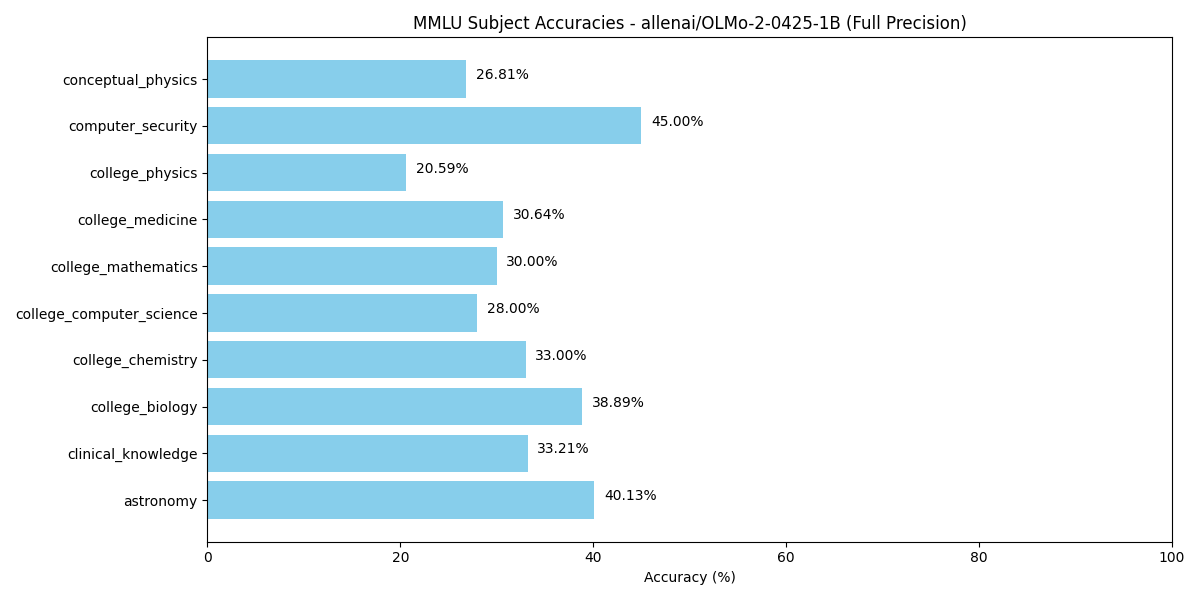

In [16]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Colab_Projects/RunningLMM/llama_3.2_1b_mmlu_accuracies_full_20260114_195647.png')

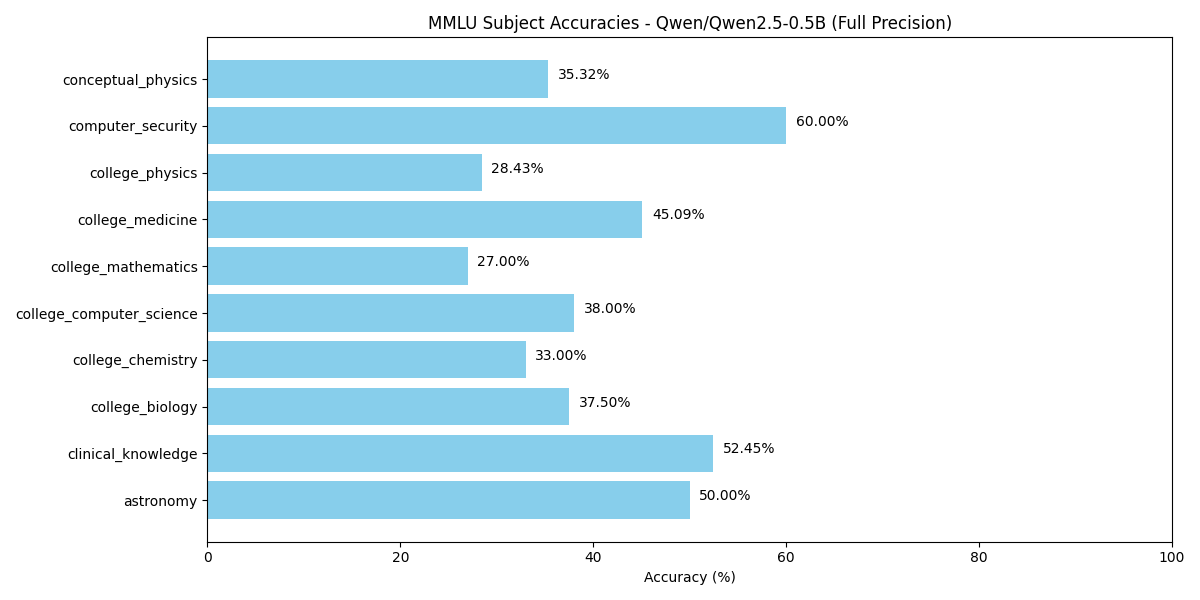

In [13]:
Image(filename='/content/drive/MyDrive/Colab_Projects/RunningLMM/llama_3.2_1b_mmlu_accuracies_full_20260114_194937.png')